In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier  # example base learner

In [2]:
# Load the dataset
data = pd.read_csv('fall2023-programming-assignment-3/dataset.csv')

X = data.drop('Cover_Type', axis=1)
X = X.drop('Id', axis=1)
y = data['Cover_Type']


In [3]:
print(data.shape)
print(X.shape)
print(y.shape)


(15120, 56)
(15120, 54)
(15120,)


In [4]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import math


import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import math

def train_adaboost(train_data, train_labels, iterations, depth_of_tree=20):

    weights = np.ones(train_data.shape[0]) / train_data.shape[0]
    
    decision_trees = []
    tree_weights = []

    for _ in range(iterations):

        decision_tree = DecisionTreeClassifier(max_features=1, max_depth=depth_of_tree)
        decision_tree.fit(train_data, train_labels, sample_weight=weights)
        decision_trees.append(decision_tree)

        predicted_labels = decision_tree.predict(train_data)
        
        mismatch = np.clip((1 - accuracy_score(train_labels, predicted_labels)), 1e-10, 1 - 1e-10)

        tree_weight = math.log((1 - mismatch) / mismatch) + math.log(len(np.unique(train_labels)) - 1)
        tree_weights.append(tree_weight)

        update = np.exp(tree_weight * (predicted_labels != train_labels))
        weights = weights * update / np.sum(weights * update)

    return decision_trees, tree_weights


In [5]:

def test_adaboost(models, model_weights, evaluation_data):
    sample_size, class_count = models[0].predict_proba(evaluation_data).shape

    cumulative_probabilities = np.zeros((sample_size, class_count))

    for model, weight in zip(models, model_weights):
        class_probabilities = model.predict_proba(evaluation_data)
        cumulative_probabilities += weight * class_probabilities

    predictions = np.argmax(cumulative_probabilities, axis=1) + 1

    return predictions


1 Question

In [6]:
from sklearn.model_selection import KFold
import numpy as np
from tqdm import tqdm
from sklearn.metrics import accuracy_score

def k_fold_adaboost(X, y, max_iterations, num_folds=5):
    kf = KFold(n_splits=num_folds, random_state=1234, shuffle=True)

    training_accuracies = [[] for _ in range(max_iterations)]
    testing_accuracies = [[] for _ in range(max_iterations)]

    for fold, (train_index, test_index) in enumerate(kf.split(X), start=1):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        fold_training_accuracy = []
        fold_testing_accuracy = []

        for iteration in tqdm(range(1, max_iterations + 1)):
            trees, alphas = train_adaboost(X_train, y_train, iteration)

            train_predictions = test_adaboost(trees, alphas, X_train)
            training_accuracy = accuracy_score(y_train, train_predictions)
            fold_training_accuracy.append(training_accuracy)

            test_predictions = test_adaboost(trees, alphas, X_test)
            testing_accuracy = accuracy_score(y_test, test_predictions)
            fold_testing_accuracy.append(testing_accuracy)

            training_accuracies[iteration - 1].append(training_accuracy)
            testing_accuracies[iteration - 1].append(testing_accuracy)

        print(f"Fold {fold}, Average Training Accuracy: {np.mean(fold_training_accuracy)}, Average Testing Accuracy: {np.mean(fold_testing_accuracy)}")

    avg_training_accuracies = [np.mean(acc) for acc in training_accuracies]
    avg_testing_accuracies = [np.mean(acc) for acc in testing_accuracies]

    return avg_training_accuracies, avg_testing_accuracies



In [7]:
max_run= 100
training_sum, testing_sum = k_fold_adaboost(X, y, max_run)


100%|██████████| 100/100 [02:06<00:00,  1.26s/it]


Fold 1, Average Training Accuracy: 0.9933077050264549, Average Testing Accuracy: 0.8290773809523809


100%|██████████| 100/100 [04:15<00:00,  2.55s/it]


Fold 2, Average Training Accuracy: 0.9940104166666666, Average Testing Accuracy: 0.8122519841269842


100%|██████████| 100/100 [04:38<00:00,  2.79s/it]


Fold 3, Average Training Accuracy: 0.9946982473544973, Average Testing Accuracy: 0.825165343915344


100%|██████████| 100/100 [03:56<00:00,  2.37s/it]


Fold 4, Average Training Accuracy: 0.9938260582010582, Average Testing Accuracy: 0.8125297619047618


100%|██████████| 100/100 [04:58<00:00,  2.98s/it]

Fold 5, Average Training Accuracy: 0.9935416666666665, Average Testing Accuracy: 0.8160119047619047


2 Question

In [10]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def run_base_learner(X, y):
    kf = KFold(n_splits=5, random_state=1234, shuffle=True)

    total_training_accuracy = 0
    total_testing_accuracy = 0

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        base_learner = DecisionTreeClassifier(max_depth=1)
        base_learner.fit(X_train, y_train)

        train_predictions = base_learner.predict(X_train)
        training_accuracy = accuracy_score(y_train, train_predictions)
        total_training_accuracy += training_accuracy

        test_predictions = base_learner.predict(X_test)
        testing_accuracy = accuracy_score(y_test, test_predictions)
        total_testing_accuracy += testing_accuracy

    avg_training_accuracy = total_training_accuracy / kf.get_n_splits()
    avg_testing_accuracy = total_testing_accuracy / kf.get_n_splits()

    return avg_training_accuracy, avg_testing_accuracy


In [11]:
training_accuracy, testing_accuracy = run_base_learner(X, y)
print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")

Training Accuracy: 0.2862599206349207
Testing Accuracy: 0.2828703703703704


3 Question

100%|██████████| 100/100 [03:43<00:00,  2.23s/it]


Fold 1, Average Training Accuracy: 0.9929356812169311, Average Testing Accuracy: 0.8294047619047619


100%|██████████| 100/100 [03:57<00:00,  2.38s/it]


Fold 2, Average Training Accuracy: 0.9936416997354496, Average Testing Accuracy: 0.811607142857143


100%|██████████| 100/100 [03:13<00:00,  1.93s/it]


Fold 3, Average Training Accuracy: 0.9946552579365079, Average Testing Accuracy: 0.8239616402116403


100%|██████████| 100/100 [03:56<00:00,  2.36s/it]


Fold 4, Average Training Accuracy: 0.9925090939153439, Average Testing Accuracy: 0.8118419312169314


100%|██████████| 100/100 [03:15<00:00,  1.96s/it]


Fold 5, Average Training Accuracy: 0.9940376984126985, Average Testing Accuracy: 0.8168287037037036


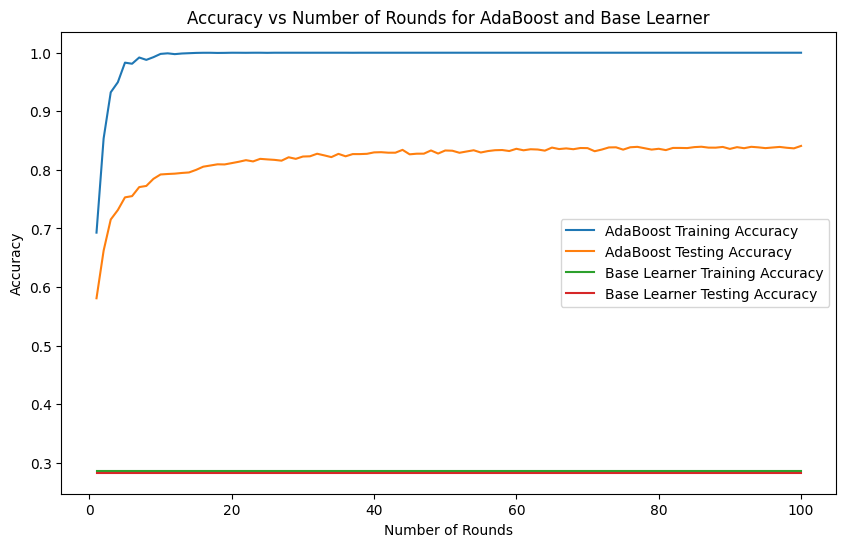

In [12]:
import matplotlib.pyplot as plt

max_rounds = 100  
adaboost_train_acc, adaboost_test_acc = k_fold_adaboost(X, y, max_rounds)
base_learner_train_acc = []
base_learner_test_acc = []

for round in range(1, max_rounds + 1):
    train_acc, test_acc = run_base_learner(X, y)
    base_learner_train_acc.append(train_acc)
    base_learner_test_acc.append(test_acc)

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_rounds + 1), adaboost_train_acc, label='AdaBoost Training Accuracy')
plt.plot(range(1, max_rounds + 1), adaboost_test_acc, label='AdaBoost Testing Accuracy')
plt.plot(range(1, max_rounds + 1), base_learner_train_acc, label='Base Learner Training Accuracy')
plt.plot(range(1, max_rounds + 1), base_learner_test_acc, label='Base Learner Testing Accuracy')
plt.xlabel('Number of Rounds')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Rounds for AdaBoost and Base Learner')
plt.legend()
plt.show()

4 Question

Answer: When you increase the depth of the tree, the accuarcy of the training and testing will be increased and also the depth is increased the accuracy which remains stagnant is achived earlier which means it takes less number of number of rounds. When you observe above graph you can interept that for both base learner and adaboost learner the testing accuarcy is less than the trainer accuarcy which means the model is overfitting. 

5 Question

In [16]:
judge_data = pd.read_csv('fall2023-programming-assignment-3/judge-no-labels.csv')

i = judge_data['Id'].values
judge_data = judge_data.drop(['Id'],axis=1)
max_rounds = max_run  
tree_max_depth = 20

trained_trees, trained_alphas = train_adaboost(X, y, iterations=max_rounds, depth_of_tree=tree_max_depth)

judge_predictions = test_adaboost(trained_trees, trained_alphas, judge_data)

output_file = 'judge-predictions.csv'
pd.DataFrame(judge_predictions, columns=['Cover_Type'], index= i).to_csv(output_file, index=True, index_label="ID")
